In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv file into pandas, you can file the data on this link: 
# https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b
crime = pd.read_csv('crime.csv', encoding='cp1252')
# filter and get only bank robbery
bankrobcrime = crime[crime['OFFENSE_DESCRIPTION'] == 'ROBBERY - BANK']
# check if the dataset contain null value in occurrace date or not
print("number of null date in dataset:", bankrobcrime['OCCURRED_ON_DATE'].isnull().sum())
# briefly look at the data
bankrobcrime.head()

number of null date in dataset: 0


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
12549,I182057201,351,Robbery,ROBBERY - BANK,D4,134,NaN,2018-07-20 15:12:00,2018,7,Friday,15,Part One,BOYLSTON ST,42.350379,-71.076261,"(42.35037870, -71.07626098)"
16704,I182052778,351,Robbery,ROBBERY - BANK,D4,623,NaN,2018-07-05 12:32:00,2018,7,Thursday,12,Part One,COMMONWEALTH AVE,42.348776,-71.096068,"(42.34877575, -71.09606805)"
17235,I182052225,351,Robbery,ROBBERY - BANK,A1,97,NaN,2018-07-03 14:50:00,2018,7,Tuesday,14,Part One,SCHOOL ST,42.357546,-71.058820,"(42.35754620, -71.05881953)"
18694,I182050678,351,Robbery,ROBBERY - BANK,A15,56,NaN,2018-06-28 11:15:00,2018,6,Thursday,11,Part One,THOMPSON SQ,42.375151,-71.063964,"(42.37515140, -71.06396420)"
24893,I182044109,351,Robbery,ROBBERY - BANK,C6,191,NaN,2018-06-07 17:06:00,2018,6,Thursday,17,Part One,SOUTHAMPTON ST,42.329621,-71.057638,"(42.32962107, -71.05763827)"


In [3]:
# change string in dataset into datetime and change to a list then sort it
datelist = sorted(pd.to_datetime(bankrobcrime['OCCURRED_ON_DATE']).tolist())

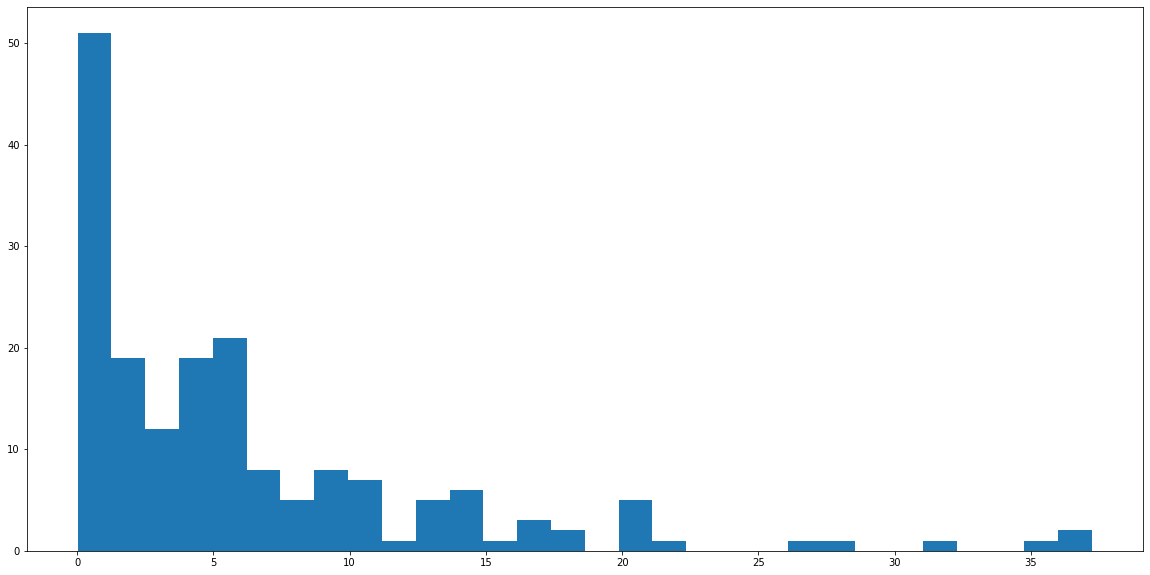

In [15]:
lt = []
for i in range(1,len(datelist)):
    lt.append((datelist[i]-datelist[i-1]).total_seconds() / (3600*24))
plt.figure(figsize=(20,10))
plt.hist(lt,30)
plt.show()

In [4]:
# find the count of all rows = number of bank robbery
noofevent = len(datelist)
# find the time lenght by subtracting the latest time with earlliest time
diftime = datelist[len(datelist)-1]-datelist[0]

# find rate of event in a second, lamda in miniute time scale
tatoltime = diftime.total_seconds()
rateofarrivelinsecond = noofevent/tatoltime # per minute

# find rate of event in a minitue, lamda in miniute time scale
tatoltime = diftime.total_seconds() / 60
rateofarrivelinminute = noofevent/tatoltime # per minute

# find rate of event in an hour, lamda in hour time scale
tatoltime = diftime.total_seconds() / 3600
rateofarrivelinhour = noofevent/tatoltime # per an hour

# find rate of event in a day, lamda in day time scale
tatoltime = diftime.total_seconds() / (3600*24)
rateofarrivelinday = noofevent/tatoltime # per an day

# print results
print("number of robbery =",noofevent)
print("time range",diftime)
print("time range in days",diftime.total_seconds() / 3600*24)
print("rate of robbery per second",rateofarrivelinsecond)
print("rate of robbery per minute",rateofarrivelinminute)
print("rate of robbery per hour",rateofarrivelinhour)
print("rate of robbery per day",rateofarrivelinday)
print("average hours between a robberry",1/rateofarrivelinhour)
print("average days between a robberry",1/rateofarrivelinday)

number of robbery = 181
time range 1127 days 07:51:00
time range in days 649340.3999999999
rate of robbery per second 1.8582959980106992e-06
rate of robbery per minute 0.00011149775988064195
rate of robbery per hour 0.0066898655928385176
rate of robbery per day 0.16055677422812442
average hours between a robberry 149.47983425414364
average days between a robberry 6.228326427255985


In [5]:
from math import exp, factorial
# formula P(k,t) = (((lamda*tau)**k)*exp((-lamda)*tau))/factorial(k)
# k is number of event we expect
# lamda is rate of occourance
# tau is amount of time we expect
k = 1 # 1 robbery
lamda = rateofarrivelinday # number of robbery in one day
tau = 6 # number of day we expect robbery to happend
p = (((lamda*tau)**k)*exp((-lamda)*tau))/factorial(k) # probability
print(p)

0.3676261177709658


max probability 0.7253408849762196
probability peak at tua = 0
sum of all probability = 0.9999999999976


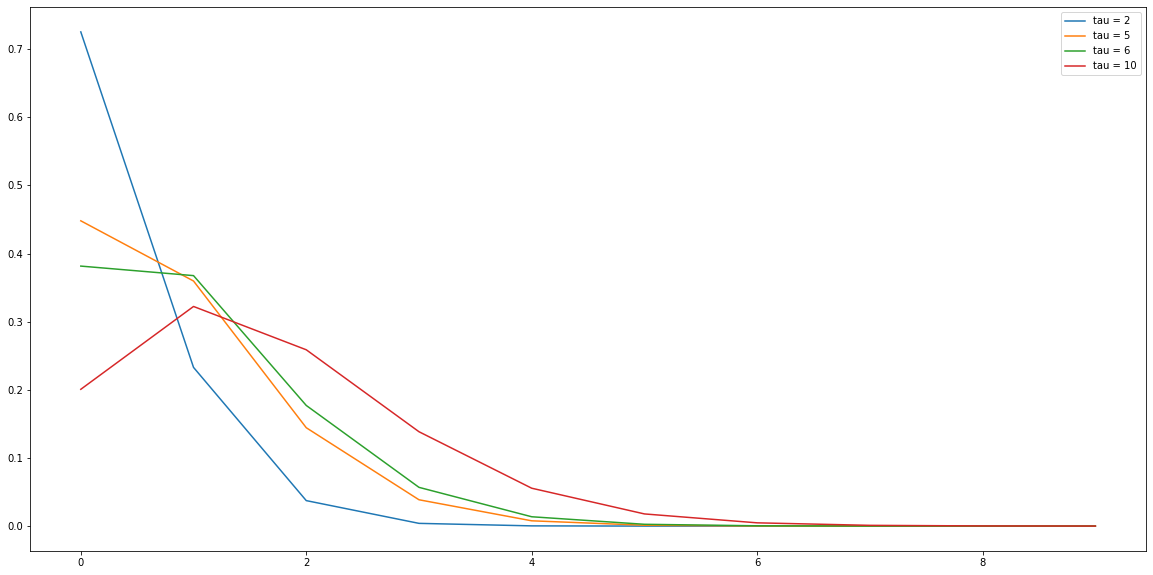

In [6]:
# ploting graph
problist = []
tau = [2,5,6,10]
lamda = rateofarrivelinday # number of robbery in one day
for i in range(0,4) :
    eachproblist = []
    for k in range(0,10):
        eachproblist.append((((lamda*tau[i])**k)*exp((-lamda)*tau[i]))/factorial(k))
    problist.append(eachproblist)

# check first tau, tau = 2
print("max probability",max(problist[0]))
print("probability peak at tua =",problist[0].index(max(problist[0])))
print("sum of all probability =",sum(problist[0]))
plt.figure(figsize=(20,10))
for i in range(0,len(problist)) :
    plt.plot(problist[i], label="tau = " + str(tau[i]))
plt.legend()

max probability 0.16055677422812442
probability peak at tua = 0
sum of all probability = 1.0820725270403886


<BarContainer object of 5 artists>

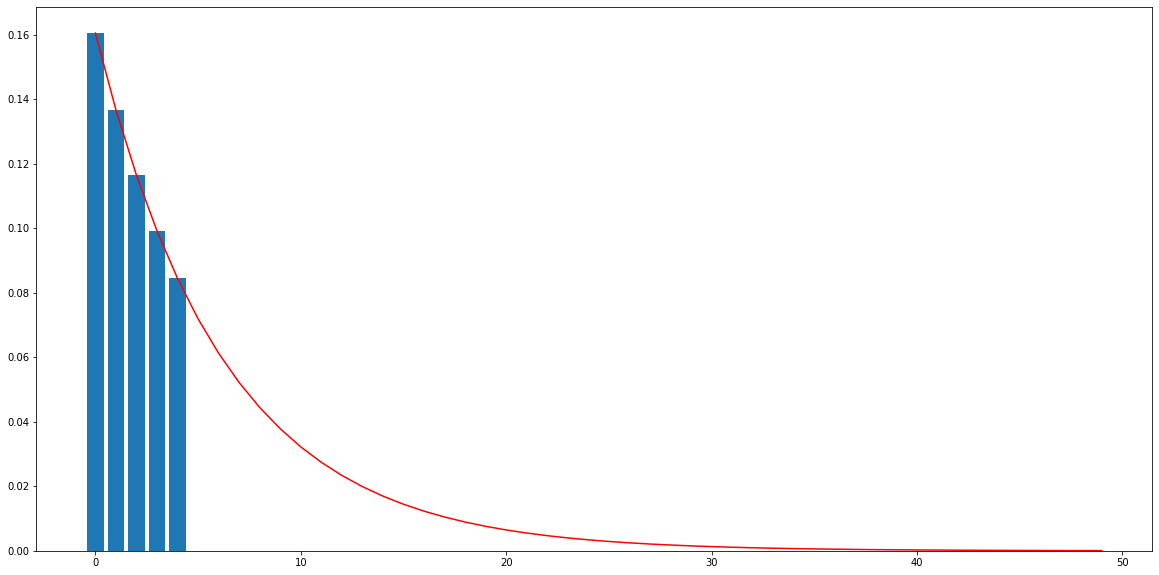

In [7]:
problist2 = []
k = 1 # 1 robbery
lamda = rateofarrivelinday # number of robbery in one hour
iss = []
for i in range(0,50):
    tau = i
    iss.append(i)
    problist2.append((lamda)*exp((-lamda)*tau))
    
print("max probability",max(problist2))
print("probability peak at tua =",problist2.index(max(problist2)))
print("sum of all probability =",sum(problist2))
plt.figure(figsize=(20,10))
plt.plot(problist2, color='r')
plt.bar(iss[0:5],problist2[0:5])

max probability 0.9996169258319146
probability peak at tua = 49
sum of all probability = 43.26049908362669


<BarContainer object of 1 artists>

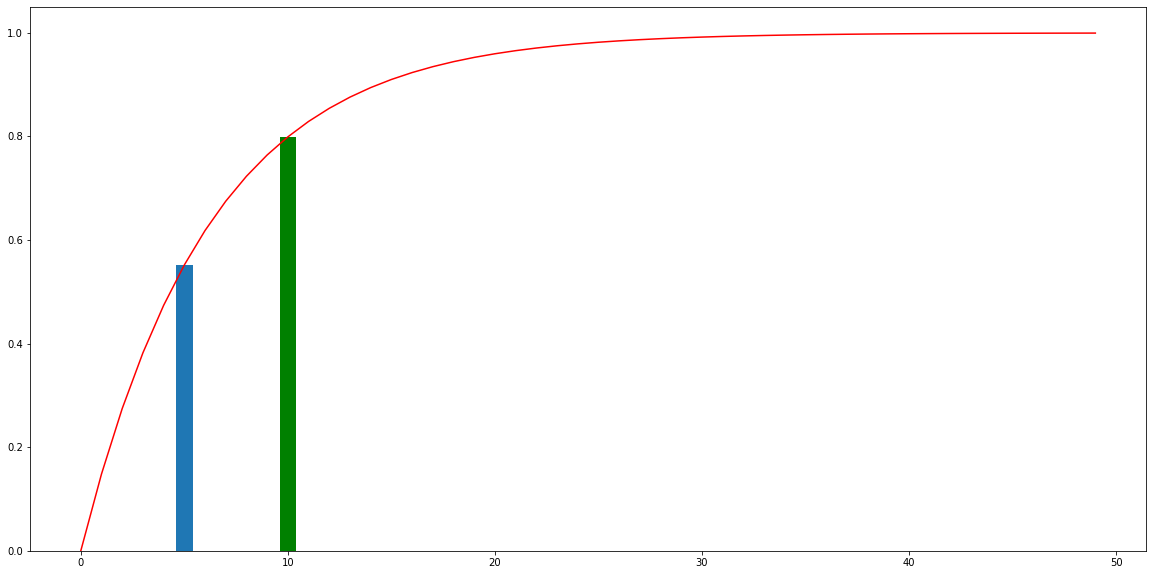

In [8]:
problist3 = []
k = 1 # 1 robbery
lamda = rateofarrivelinday # number of robbery in one hour
for i in range(0,50):
    tau = i
    problist3.append(1 - exp((-lamda)*tau))
print("max probability",max(problist3))
print("probability peak at tua =",problist3.index(max(problist3)))
print("sum of all probability =",sum(problist3))
plt.figure(figsize=(20,10))
plt.plot(problist3, color='r')
plt.bar(5,problist3[5])
plt.bar(10,problist3[10], color='g')